In [1]:
import pandas as pd
import numpy as np

In [2]:
true = pd.read_csv('dataset/True.csv')
fake = pd.read_csv('dataset/Fake.csv')

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true['label'] = 1

In [6]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
fake['label'] = 0

In [8]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
df = pd.concat([fake, true], ignore_index=True)

In [10]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
df.tail()

,title,text,subject,date,label
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",0
44894,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",1
44895,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",1
44896,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0
44897,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...,IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...,politics,"Apr 23, 2015",0


In [12]:
df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [14]:
df = df.drop(['title', 'subject' , 'date'], axis=1)

In [15]:
df.head()

,text,label
0,"21st Century Wire says Ben Stein, reputable pr...",0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,"On Monday, Donald Trump once again embarrassed...",0
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


In [16]:
import re

def text_cleaning(text):
  text = text.lower()
  text = re.sub(r'https ?: //\S+|www\.\S+','',text)

  text = re.sub(r' <.*? >', '', text)

  # Remove punctuation
  text = re.sub(r'[^\w\s]', '', text)

  # Remove digits
  text = re.sub(r'\d', '', text)

  # Remove newline characters
  text = re.sub(r'\n',' ', text)

  return text

In [17]:
df['text'] = df['text'].apply(text_cleaning)

In [18]:
df['text']

,text
0,st century wire says ben stein reputable profe...
1,washington reuters us president donald trump ...
2,reuters puerto rico governor ricardo rossello...
3,on monday donald trump once again embarrassed ...
4,glasgow scotland reuters most us presidential...
...,...
44893,
44894,londontokyo reuters british prime minister th...
44895,berlin reuters chancellor angela merkel said ...
44896,jesus fcking christ our president is a moron n...


In [19]:
X = df['text']
y = df['label']

In [65]:
df['text'][0]

'st century wire says ben stein reputable professor from pepperdine university also of some hollywood fame appearing in tv shows and films such as ferris bueller s day off made some provocative statements on judge jeanine pirro s show recently while discussing the halt that was imposed on president trump s executive order on travel stein referred to the judgement by the th circuit court in washington state as a  coup d tat against the executive branch and against the constitution  stein went on to call the judges in seattle  political puppets  and the judiciary  political pawns watch the interview below for the complete statements and note the stark contrast to the rhetoric of the leftist media and pundits who neglect to note that no court has ever blocked any presidential orders in immigration in the past or discuss the legal efficacy of the halt or the actual text of the executive orderread more trump news at st century wire trump filessupport our work by subscribing  becoming a memb

In [66]:
df['label'][0]

np.int64(0)

In [20]:
y

,label
0,0
1,1
2,1
3,0
4,1
...,...
44893,0
44894,1
44895,1
44896,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.shape

(31428,)

In [24]:
X_test.shape

(13470,)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
X_train_vec = vectorization.fit_transform(X_train)
X_test_vec = vectorization.transform(X_test)

In [26]:
X_train_vec

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6451111 stored elements and shape (31428, 177106)>

In [27]:
X_test_vec

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2733212 stored elements and shape (13470, 177106)>

In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from xgboost import XGBClassifier

In [29]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [30]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [31]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

    vectorization = TfidfVectorizer()
    X_train_vec = vectorization.fit_transform(X_train)
    X_test_vec = vectorization.transform(X_test)

    models_list = []
    accuracy_list = []
    auc= []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train_vec, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train_vec)
        y_test_pred = model.predict(X_test_vec)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)

    return report

In [32]:
base_model_report =evaluate_models(X=X, y=y, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9889
- F1 score: 0.9883
- Precision: 0.9860
- Recall: 0.9906
- Roc Auc Score: 0.9889


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9966
- F1 score: 0.9964
- Precision: 0.9966
- Recall: 0.9963
- Roc Auc Score: 0.9966


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9975
- F1 score: 0.9974
- Precision: 0.9959
- Recall: 0.9988
- Roc Auc Score: 0.9975
----------------------------------
Model performance for Test set
- Accuracy: 0.9955
- F1 score: 0.9952
- Precision: 0.9930
- Recall: 0.9975
- Roc Auc Score: 0.9956


Logistic Regression
Model performance for Training 

In [33]:
base_model_report

,Model Name,Accuracy
5,XGBClassifier,0.997699
1,Decision Tree,0.996585
2,Gradient Boosting,0.995471
7,AdaBoost Classifier,0.995174
6,Support Vector Classifier,0.994284
0,Random Forest,0.988864
3,Logistic Regression,0.986488
4,K-Neighbors Classifier,0.679362


In [34]:
import joblib

best_model = models["XGBClassifier"]
joblib.dump(best_model, "xgb_classifier.pkl")

print("Model saved as random_forest.pkl")

Model saved as random_forest.pkl


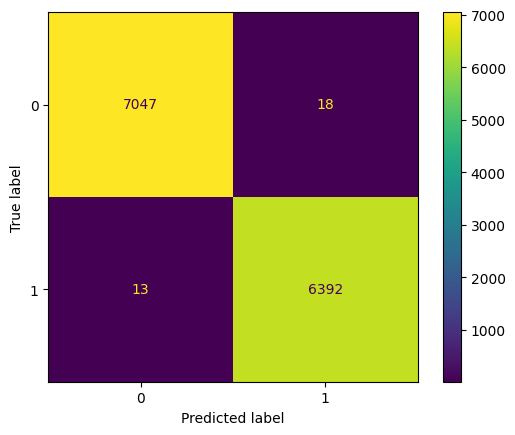

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test_vec, y_test)

In [68]:
#Combining model with vectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_vec, y_train)

import pickle

model_bundle = {
    "model": model,
    "vectorizer": vectorizer
}

with open("model.pkl", "wb") as f:
    pickle.dump(model_bundle, f)

print("Model and Vectorizer saved as model.pkl")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:37:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model and Vectorizer saved as model.pkl


In [46]:
with open("xgb_model_with_vectorizer.pkl", "rb") as f:
    bundle = pickle.load(f)
    model = bundle["model"]
    vectorizer = bundle["vectorizer"]

# Clean and predict function
def text_cleaning(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\n', ' ', text)
    return text

def predict_news(text):
    cleaned_text = text_cleaning(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)[0]
    return "True" if prediction == 1 else "Fake"

In [67]:
print(predict_news("st century wire says ben stein reputable professor from pepperdine university also of some hollywood fame appearing in tv shows and films such as ferris bueller s day off made some provocative statements on judge jeanine pirro s show recently while discussing the halt that was imposed on president trump s executive order on travel stein referred to the judgement by the th circuit court in washington state as a  coup d tat against the executive branch and against the constitution  stein went on to call the judges in seattle  political puppets  and the judiciary  political pawns watch the interview below for the complete statements and note the stark contrast to the rhetoric of the leftist media and pundits who neglect to note that no court has ever blocked any presidential orders in immigration in the past or discuss the legal efficacy of the halt or the actual text of the executive orderread more trump news at st century wire trump filessupport our work by subscribing  becoming a member wiretv "))

Fake


In [64]:
print(predict_news("vientiane reuters  the united states announced on tuesday it would provide an additional  million over the next three years to help laos heavily bombed during the vietnam war clear unexploded ordnance that has killed or injured more than  people the figure announced during president barack obamas first visit to laos is close to the  million the united states has spent in the past  years on clearing its uxo in laos from  to  us warplanes dropped more than  million cluster munitions on the communist country onethird of which did not explode the lao national regulatory authority for uxo says obama became the first us president to visit laos when he arrived in the onceisolated country on monday to attend two regional summits half a century after americas secret war left laos with the unfortunate distinction of being the most heavily bombed country per capita in history the white house said in a statement us programs in laos had helped slash uxo casualties from  to less than  a year and the additional funding would be used for a comprehensive uxo survey of laos and for continued clearing operations the united states is helping laos clear unexploded ordnance which poses a threat to people and hampers economic development it said the package would help support uxo victims needing rehabilitation including orthotics and prosthetics it added obama in a speech on tuesday in the capital vientiane addressed the secret war as a result of that conflict many people fled or were driven from their homes obama said at the time america did not acknowledge its role i believe the united states has a moral obligation to help laos heal uxo remains a stubborn problem in the region and experts say it could take decades to clear landmines and bombs in laos cambodia and vietnam which were beset by conflicts in the s and s and in cambodias case in the s and s too in the central lao province of xieng khouang the area most heavily bombed by us aircraft during the war in neighboring vietnam there is a trail of devastation about  percent of the people of landlocked laos rely on agriculture but some of it is simply too dangerous to farm approximately a quarter of its villages are contaminated with unexploded ordnance says the britishbased mines advisory group which helps find and destroy the bombs on wednesday obama is expected to visit an organization in vientiane that works with those disabled by unexploded ordnance the cooperative orthotic and prosthetic enterprise visitor center "))

True
